# WeatherPy
----

### Analysis

* The  closest we are to equator, the warmer is weather. 
* Humidity is significantly higher between 20 and 60 degrees latitude.
* we cannot prove any significant correlation between latitude and wind or cloudiness.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
#"What's the weather like as we approach the equator?"

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import urllib.parse

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)


## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lon = []
cities = []

# Create a set of random lat and lng combinations

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lon = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
 
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
data = []
url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    c = urllib.parse.quote_plus(city)
    query_url = f"{url}q={c}&appid={api_key}"
    weather_response = requests.get(query_url).json()

    try:
        city_data = [weather_response["name"], 
                     weather_response["sys"]["country"],
                     weather_response["main"]["temp"],
                     weather_response["main"]["humidity"],
                     weather_response["wind"]["speed"],
                     weather_response["clouds"]["all"],
                     weather_response["dt"],
                     weather_response["coord"]["lat"],
                     weather_response["coord"]["lon"]]
                    
        data.append(city_data)
        
        print(f"Processing Record {cities.index(city)} | {weather_response['name']}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")              
print("Data Retrieval Complete")     
print("-----------------------------")


City not found. Skipping...
Processing Record 1 | Bredasdorp
Processing Record 2 | Flinders
Processing Record 3 | Ribeira Grande
Processing Record 4 | Provideniya
Processing Record 5 | New Norfolk
Processing Record 6 | Kavieng
Processing Record 7 | Hobart
Processing Record 8 | Mataura
Processing Record 9 | Ushuaia
Processing Record 10 | Jamestown
Processing Record 11 | Lorengau
Processing Record 12 | Nagyoroszi
Processing Record 13 | Talcahuano
Processing Record 14 | Punta Arenas
Processing Record 15 | Kapaa
City not found. Skipping...
Processing Record 17 | Phonhong
Processing Record 18 | Barrow
Processing Record 19 | Gidole
Processing Record 20 | Giresun
City not found. Skipping...
Processing Record 22 | Alofi
Processing Record 23 | Hithadhoo
Processing Record 24 | Mirnyy
Processing Record 25 | Rikitea
Processing Record 26 | Arraial do Cabo
Processing Record 27 | Cape Town
Processing Record 28 | Gat
Processing Record 29 | Caete
Processing Record 30 | Kijang
Processing Record 31 | Ver

Processing Record 253 | Sao Felix do Xingu
City not found. Skipping...
Processing Record 255 | Mitu
Processing Record 256 | Parrita
Processing Record 257 | Hualmay
Processing Record 258 | Mezen
Processing Record 259 | Longyearbyen
Processing Record 260 | Sao Joao da Barra
Processing Record 261 | Meulaboh
City not found. Skipping...
Processing Record 263 | Fallon
Processing Record 264 | Najran
Processing Record 265 | Moose Factory
Processing Record 266 | San Quintin
Processing Record 267 | Chalus
Processing Record 268 | Severo-Kurilsk
Processing Record 269 | Shimoda
Processing Record 270 | Kerchevskiy
Processing Record 271 | Novobirilyussy
Processing Record 272 | Poum
Processing Record 273 | Vardo
Processing Record 274 | Guozhen
Processing Record 275 | Broome
Processing Record 276 | Wad Rawah
City not found. Skipping...
Processing Record 278 | Cururupu
Processing Record 279 | Sonqor
Processing Record 280 | Clyde River
City not found. Skipping...
City not found. Skipping...
Processing Re

City not found. Skipping...
Processing Record 504 | Kayerkan
Processing Record 505 | Arman
Processing Record 506 | Nouadhibou
Processing Record 507 | Yulara
Processing Record 508 | Manono
Processing Record 509 | Celestun
Processing Record 510 | Hinton
City not found. Skipping...
Processing Record 512 | Huanren
Processing Record 513 | Kisangani
Processing Record 514 | Atar
Processing Record 515 | Katsuura
Processing Record 516 | Bonthe
Processing Record 517 | Lagunas
Processing Record 518 | Tarauaca
Processing Record 519 | Biak
City not found. Skipping...
Processing Record 521 | Caravelas
Processing Record 522 | Turka
Processing Record 523 | Villa Carlos Paz
Processing Record 524 | Knysna
Processing Record 525 | Margate
Processing Record 526 | Mont-de-Marsan
Processing Record 527 | Tilichiki
Processing Record 528 | Yar-Sale
Processing Record 529 | Portland
Processing Record 530 | Arrifes
Processing Record 531 | Mopti
Processing Record 532 | Mandali
Processing Record 533 | El Alto
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:

weather_df = pd.DataFrame.from_records(data, columns=["City", "Country", "Temperature F", "Humidity", "Wind Speed", "Cloudiness",
                                         "Date", "Lat", "Lng"])

weather_df.to_csv("weather.csv", index=False, header=True)
weather_df.head()


,City,Country,Temperature F,Humidity,Wind Speed,Cloudiness,Date,Lat,Lng
0,Bredasdorp,ZA,293.330,73,7.20,32,1553796059,-34.53,20.04
1,Flinders,AU,289.870,100,2.60,20,1553796607,-34.58,150.85
2,Ribeira Grande,PT,290.150,48,5.10,40,1553796000,38.52,-28.70
3,Provideniya,RU,270.928,96,4.56,88,1553796712,64.42,-173.23
4,New Norfolk,AU,288.410,67,2.10,0,1553796674,-42.78,147.06


In [21]:
weather_df.count()

City             562
Country          562
Temperature F    562
Humidity         562
Wind Speed       562
Cloudiness       562
Date             562
Lat              562
Lng              562
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

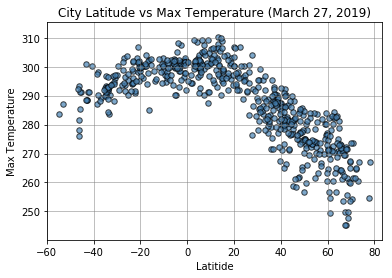

In [23]:
# Build the scatter plot

plt.scatter(weather_df["Lat"],
            weather_df["Temperature F"],  
            facecolors="steelblue", edgecolors="black", alpha=0.7,
            label = weather_df["City"],
            marker= "o", linewidth=1, s= 30)

plt.title("City Latitude vs Max Temperature (March 27, 2019)")
plt.xlabel("Latitide")
plt.ylabel("Max Temperature")

plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= weather_df["Lat"].min()-5, right= weather_df["Lat"].max()+5)
plt.ylim(bottom= weather_df["Temperature F"].min()-5, top= weather_df["Temperature F"].max()+5)

plt.savefig("City Latitude vs Max Temperature (March 27, 2019).png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

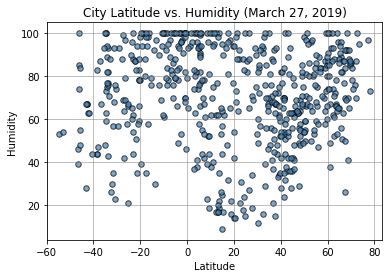

In [24]:
plt.scatter(weather_df["Lat"], 
            weather_df["Humidity"],
            facecolor = "steelblue", edgecolors = "black",
            alpha = 0.7, s = 30, label = weather_df["City"],
            marker = "o", linewidth = 1)

plt.title("City Latitude vs. Humidity (March 27, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(color = "grey", linestyle = "-", linewidth = .5)
plt.xlim(left = weather_df["Lat"].min()-5, right = weather_df["Lat"].max()+5)
plt.ylim(bottom = weather_df["Humidity"].min()-5, top = 100 +5)

plt.savefig("City Latitude vs Humidity (March 27, 2019).png")

plt.show()

#### Latitude vs. Cloudiness Plot

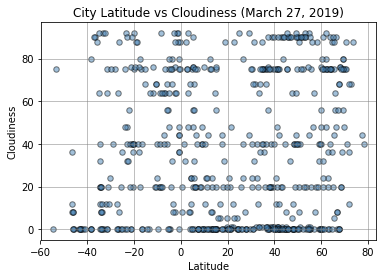

In [25]:
plt.scatter(weather_df["Lat"],
            weather_df["Cloudiness"],  
            facecolors='steelblue', edgecolors="black", alpha=0.5,
            label = weather_df["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (March 27, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= weather_df["Lat"].min()-5, right= weather_df["Lat"].max()+5)
plt.ylim(bottom= weather_df["Cloudiness"].min()-5, top= weather_df["Cloudiness"].max()+5)

# Save Figure
plt.savefig("City Latitude vs Cloudiness (March 27, 2019).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

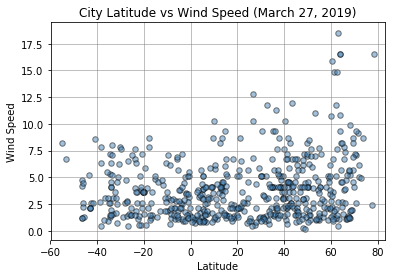

In [26]:
plt.scatter(weather_df["Lat"],
            weather_df["Wind Speed"],  
            facecolors='steelblue', edgecolors="black", alpha=0.5,
            label = weather_df["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (March 27, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(left= weather_df["Lat"].min()-5, right= weather_df["Lat"].max()+5)
plt.ylim(bottom= weather_df["Wind Speed"].min()-1, top= weather_df["Wind Speed"].max()+1)

# Save Figure
plt.savefig("City Latitude vs Wind Speed (March 27, 2019).png")

# Show plot
plt.show()